<a href="https://colab.research.google.com/github/viola2002/2025_DeepLearning_for_AI/blob/main/0403_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
train_images_with_noise_channels.shape

(60000, 1568)

In [ ]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [ ]:
np.zeros((len(train_images), 784)).shape

(60000, 784)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6989 - loss: 1.0415 - val_accuracy: 0.9184 - val_loss: 0.2846
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9151 - loss: 0.2770 - val_accuracy: 0.9457 - val_loss: 0.1875
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9465 - loss: 0.1707 - val_accuracy: 0.9427 - val_loss: 0.1842
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9645 - loss: 0.1154 - val_accuracy: 0.9444 - val_loss: 0.1813
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0838 - val_accuracy: 0.9601 - val_loss: 0.1350
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9624 - val_loss: 0.1307
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9653 - val_loss: 0.1279
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0311 - val_accuracy: 0.

In [ ]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8587 - loss: 0.4835 - val_accuracy: 0.9546 - val_loss: 0.1570
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9609 - loss: 0.1329 - val_accuracy: 0.9683 - val_loss: 0.1124
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0851 - val_accuracy: 0.9737 - val_loss: 0.0909
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9837 - loss: 0.0561 - val_accuracy: 0.9743 - val_loss: 0.0850
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0440 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0331 - val_accuracy: 0.9776 - val_loss: 0.0768
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9942 - loss: 0.0225 - val_accuracy: 0.9779 - val_loss: 0.0775
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0172 - val_accuracy: 0.

**Plotting a validation accuracy comparison**

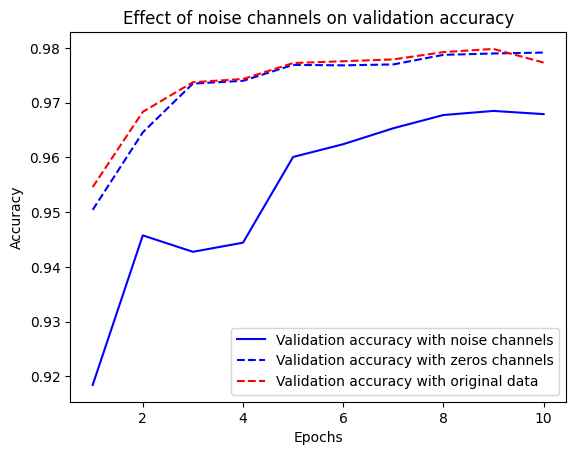

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

val_acc_original = history_original.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", #x axis #y axis #line style
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", #x axis #y axis #line style
         label="Validation accuracy with zeros channels")

plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original data")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1049 - loss: 2.3326 - val_accuracy: 0.1107 - val_loss: 2.3061
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1199 - loss: 2.2984 - val_accuracy: 0.1048 - val_loss: 2.3095
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1278 - loss: 2.2894 - val_accuracy: 0.1034 - val_loss: 2.3179
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1429 - loss: 2.2767 - val_accuracy: 0.1009 - val_loss: 2.3243
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1548 - loss: 2.2570 - val_accuracy: 0.1007 - val_loss: 2.3327
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1701 - loss: 2.2365 - val_accuracy: 0.0998 - val_loss: 2.3512
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1872 - loss: 2.2109 - val_accuracy: 0.1042 - val_loss: 2.3669
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2047 - loss: 2.1834 - val_accu

In [ ]:
print(history.history["accuracy"])

[0.10343749821186066,
 0.11768750101327896,
 0.12604166567325592,
 0.13870833814144135,
 0.1496874988079071,
 0.16610416769981384,
 0.1822083294391632,
 0.19731250405311584,
 0.21383333206176758,
 0.22995834052562714,
 0.2473958283662796,
 0.26477083563804626,
 0.2841250002384186,
 0.29908332228660583,
 0.3177083432674408,
 0.33033332228660583,
 0.3501250147819519,
 0.36516666412353516,
 0.3774583339691162,
 0.3949166536331177,
 0.40687501430511475,
 0.42120832204818726,
 0.43566668033599854,
 0.4501666724681854,
 0.46397915482521057,
 0.476520836353302,
 0.4868125021457672,
 0.5007083415985107,
 0.5098749995231628,
 0.5255625247955322,
 0.5345208048820496,
 0.542354166507721,
 0.5526875257492065,
 0.565750002861023,
 0.5753541588783264,
 0.5857916474342346,
 0.59395831823349,
 0.6024791598320007,
 0.6130833625793457,
 0.620354175567627,
 0.6297916769981384,
 0.6395208239555359,
 0.6466458439826965,
 0.6520208120346069,
 0.6600624918937683,
 0.6669583320617676,
 0.6747291684150696,
 0.

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4448 - loss: 3621.2122 - val_accuracy: 0.2069 - val_loss: 2.1067
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2203 - loss: 3.0833 - val_accuracy: 0.2012 - val_loss: 2.2492
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2023 - loss: 2.3900 - val_accuracy: 0.2193 - val_loss: 2.2834
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2366 - loss: 2.5475 - val_accuracy: 0.2200 - val_loss: 2.0959
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2349 - loss: 2.4442 - val_accuracy: 0.2166 - val_loss: 2.5517
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2332 - loss: 2.5520 - val_accuracy: 0.2376 - val_loss: 2.3317
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2194 - loss: 2.3290 - val_accuracy: 0.2562 - val_loss: 2.2728
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2193 - loss: 2.2015 - val_accuracy:

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8389 - loss: 0.8338 - val_accuracy: 0.9558 - val_loss: 0.1685
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9628 - loss: 0.1292 - val_accuracy: 0.9593 - val_loss: 0.1657
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0944 - val_accuracy: 0.9700 - val_loss: 0.1387
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9794 - loss: 0.0762 - val_accuracy: 0.9688 - val_loss: 0.1705
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0654 - val_accuracy: 0.9713 - val_loss: 0.1646
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9855 - loss: 0.0553 - val_accuracy: 0.9648 - val_loss: 0.2290
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9874 - loss: 0.0487 - val_accuracy: 0.9671 - val_loss: 0.2345
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0455 - val_accuracy: 0.

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7425 - loss: 1.0332 - val_accuracy: 0.9008 - val_loss: 0.3614
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8998 - loss: 0.3700 - val_accuracy: 0.9152 - val_loss: 0.3098
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9101 - loss: 0.3195 - val_accuracy: 0.9183 - val_loss: 0.2926
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9167 - loss: 0.3028 - val_accuracy: 0.9204 - val_loss: 0.2851
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.2873 - val_accuracy: 0.9225 - val_loss: 0.2789
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9200 - loss: 0.2887 - val_accuracy: 0.9227 - val_loss: 0.2770
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9201 - loss: 0.2803 - val_accuracy: 0.9258 - val_loss: 0.2726
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9234 - loss: 0.2779 - val_accuracy: 0.

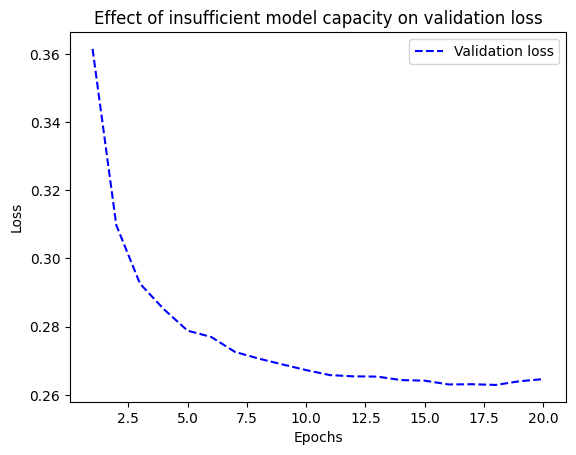

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8236 - loss: 0.6415 - val_accuracy: 0.9432 - val_loss: 0.2001
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9466 - loss: 0.1794 - val_accuracy: 0.9601 - val_loss: 0.1380
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9655 - loss: 0.1191 - val_accuracy: 0.9642 - val_loss: 0.1217
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9717 - loss: 0.0940 - val_accuracy: 0.9673 - val_loss: 0.1074
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0719 - val_accuracy: 0.9714 - val_loss: 0.0931
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9829 - loss: 0.0564 - val_accuracy: 0.9723 - val_loss: 0.0919
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9866 - loss: 0.0476 - val_accuracy: 0.9734 - val_loss: 0.0914
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0377 - val_accuracy: 0.

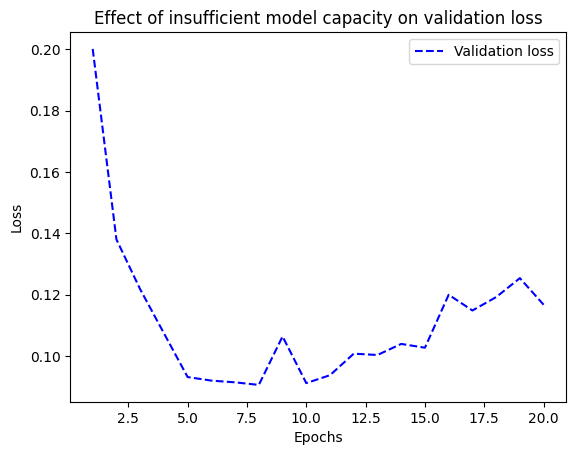

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6509 - loss: 0.6140 - val_accuracy: 0.8629 - val_loss: 0.3970
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8941 - loss: 0.3359 - val_accuracy: 0.8850 - val_loss: 0.3057
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9219 - loss: 0.2395 - val_accuracy: 0.8882 - val_loss: 0.2799
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9438 - loss: 0.1861 - val_accuracy: 0.8897 - val_loss: 0.2736
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9541 - loss: 0.1485 - val_accuracy: 0.8894 - val_loss: 0.2791
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9603 - loss: 0.1316 - val_accuracy: 0.8855 - val_loss: 0.2915
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9637 - loss: 0.1149 - val_accuracy: 0.8829 - val_loss: 0.3025
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accura

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5914 - loss: 0.6482 - val_accuracy: 0.7607 - val_loss: 0.5647
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7885 - loss: 0.5332 - val_accuracy: 0.8615 - val_loss: 0.5260
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8546 - loss: 0.4840 - val_accuracy: 0.8602 - val_loss: 0.4862
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8901 - loss: 0.4378 - val_accuracy: 0.8677 - val_loss: 0.4632
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9140 - loss: 0.4042 - val_accuracy: 0.8791 - val_loss: 0.4465
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9299 - loss: 0.3761 - val_accuracy: 0.8702 - val_loss: 0.4366
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9408 - loss: 0.3491 - val_accuracy: 0.8726 - val_loss: 0.4269
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9493 - loss: 0.3258 - val_accuracy: 0.8536 - v

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - accuracy: 0.6889 - loss: 0.6463 - val_accuracy: 0.8638 - val_loss: 0.3431
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8606 - loss: 0.3421 - val_accuracy: 0.8858 - val_loss: 0.2843
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9091 - loss: 0.2317 - val_accuracy: 0.8572 - val_loss: 0.3421
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9232 - loss: 0.1973 - val_accuracy: 0.8627 - val_loss: 0.3472
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9368 - loss: 0.1584 - val_accuracy: 0.8774 - val_loss: 0.3009
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9673 - loss: 0.0962 - val_accuracy: 0.8580 - val_loss: 0.3967
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9723 - loss: 0.0806 - val_accuracy: 0.8746 - val_loss: 0.3929
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9852 - loss: 0.0583 - val_accuracy: 0.8854 - v

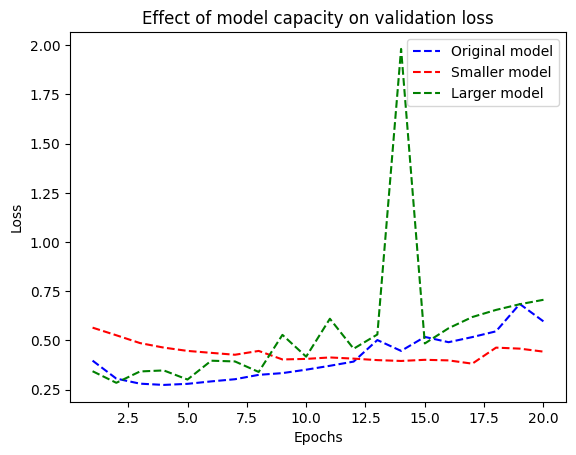

In [ ]:
val_loss_ori = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_ori, "b--",
         label="Validation loss (Original)")
plt.plot(epochs, val_loss_smaller, "r--",
         label="Validation loss (Smaller)")
plt.plot(epochs, val_loss_larger, "g--",
         label="Validation loss (Larger)")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # 60%-40% split

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.6479 - loss: 0.7137 - val_accuracy: 0.8157 - val_loss: 0.5354
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8790 - loss: 0.4582 - val_accuracy: 0.8739 - val_loss: 0.4136
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9110 - loss: 0.3530 - val_accuracy: 0.8870 - val_loss: 0.3690
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9240 - loss: 0.3101 - val_accuracy: 0.8857 - val_loss: 0.3613
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9305 - loss: 0.2829 - val_accuracy: 0.8867 - val_loss: 0.3569
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9405 - loss: 0.2623 - val_accuracy: 0.8860 - val_loss: 0.3592
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9435 - loss: 0.2490 - val_accuracy: 0.8718 - val_loss: 0.3963
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9467 - loss: 0.2466 - val_accuracy: 0.8768 - 

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.5782 - loss: 0.6681 - val_accuracy: 0.8327 - val_loss: 0.5405
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7324 - loss: 0.5539 - val_accuracy: 0.8709 - val_loss: 0.4346
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8013 - loss: 0.4693 - val_accuracy: 0.8763 - val_loss: 0.3779
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8372 - loss: 0.4156 - val_accuracy: 0.8769 - val_loss: 0.3296
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8632 - loss: 0.3595 - val_accuracy: 0.8873 - val_loss: 0.3038
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8879 - loss: 0.3181 - val_accuracy: 0.8905 - val_loss: 0.2874
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9020 - loss: 0.2840 - val_accuracy: 0.8882 - val_loss: 0.2780
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9140 - loss: 0.2539 - val_accuracy: 0.8882 - 

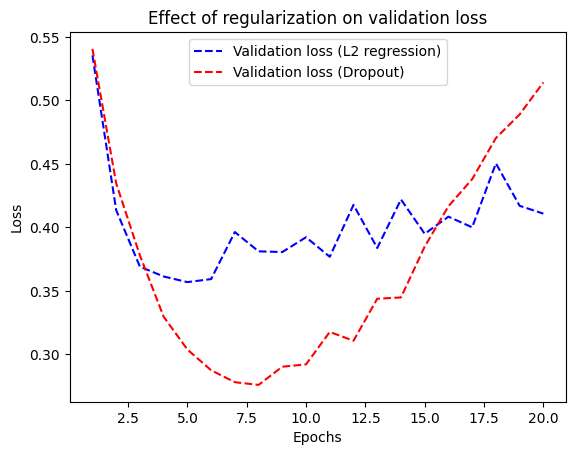

In [ ]:
val_loss_l2 = history_l2_reg.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_l2, "b--",
         label="Validation loss (L2 regression)")
plt.plot(epochs, val_loss_dropout, "r--",
         label="Validation loss (Dropout)")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary